In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

cancer = load_breast_cancer()

# 스케일러
scaler = MinMaxScaler()
scaler.fit(cancer.data)  # 라벨 없음
X_scaled = scaler.transform(cancer.data)

#PCA 모델 생성
pca = PCA(n_components=2)   # 주성분을 2개 채우자
pca.fit(X_scaled)  # 학습
X_pca = pca.transform(X_scaled)

print("원본 데이터의 형태:", X_scaled.shape)
print("축소된 데이터의 형태:", X_pca.shape)

원본 데이터의 형태: (569, 30)
축소된 데이터의 형태: (569, 2)


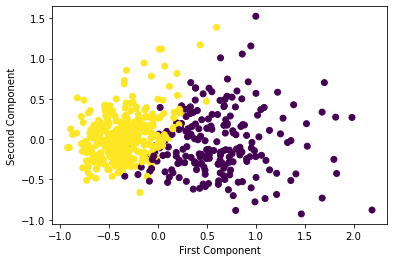

In [7]:
# 주성분의 시각화
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0],  # 첫번째 성분
           X_pca[:, 1],   # 두번째 성분
           c=cancer.target)   # 색 지정
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.show()

In [22]:
# 컴포넌트의 목록 확인
print(pca.components_)
print(len(pca.components_[0]))

[[ 2.42675774e-01  9.64786101e-02  2.52550175e-01  2.16494530e-01
   1.09694618e-01  2.40397602e-01  3.01914206e-01  3.22475470e-01
   1.11431911e-01  4.32983397e-02  1.21760615e-01 -3.91796003e-05
   1.18580603e-01  1.03569266e-01 -4.68418094e-03  1.29319789e-01
   6.56807080e-02  1.24746120e-01  1.44902467e-02  4.55013416e-02
   2.59386850e-01  1.13833007e-01  2.60708399e-01  2.05917767e-01
   1.23773566e-01  2.04993413e-01  2.44083623e-01  3.71065064e-01
   9.59229054e-02  9.46335142e-02]
 [-2.61316697e-01 -5.90579194e-02 -2.38590061e-01 -2.31106830e-01
   1.99883951e-01  2.13914883e-01  1.13810591e-01 -8.31206237e-03
   2.11115126e-01  4.06392087e-01 -6.68985209e-02  6.00114468e-02
  -5.14164640e-02 -8.29631528e-02  1.35596439e-01  2.22352585e-01
   1.02792720e-01  1.05646780e-01  1.40474907e-01  1.71995173e-01
  -2.44281614e-01 -3.96817047e-02 -2.11635403e-01 -1.98979019e-01
   2.29454510e-01  1.98064332e-01  1.54982474e-01  4.43293805e-02
   1.51168839e-01  2.58092119e-01]]
30


c:\python\python3.7\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


[0.53097689 0.1728349 ]


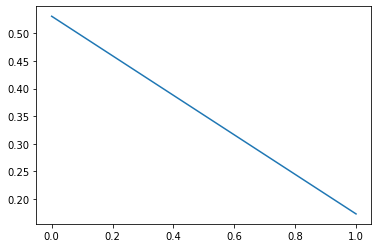

In [23]:
# scree plot
import pandas as pd
print(pca.explained_variance_ratio_)
pd.Series(pca.explained_variance_ratio_).plot()
plt.show()

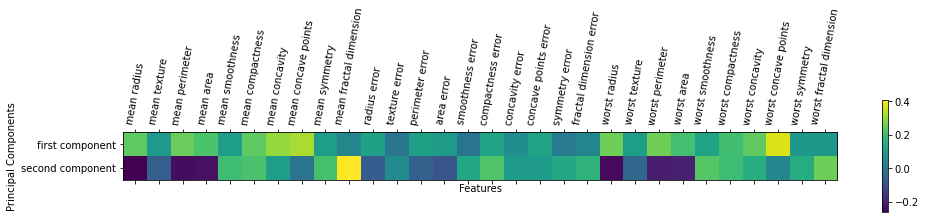

In [20]:
# 2개의 주 컴포넌트와 다른 피처들과의 관계
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names,
           rotation=80)
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()